In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import StratifiedShuffleSplit


In [2]:
data = pd.read_csv("data_cleaned.csv")

In [3]:
data.head()

,Unnamed: 0,recency_score,frequency_score,log_monetary_score,mean_review_score,dernier_review_score
0,0,-0.835177,1,4.955123,5.0,5.0
1,1,-0.815371,1,3.302849,4.0,4.0
2,2,1.977319,1,4.456902,3.0,3.0
3,3,0.551264,1,3.775516,4.0,4.0
4,4,0.333395,1,5.282645,5.0,5.0


In [4]:
data_t0 = data[["recency_score", "log_monetary_score"]] 
data_t1 = data[["recency_score", "frequency_score", "log_monetary_score"]]
data_t2 = data[["recency_score", "mean_review_score", "log_monetary_score"]]
data_t3 = data[["recency_score", "dernier_review_score", "log_monetary_score"]]
data_t4 = data[["recency_score", "dernier_review_score", "log_monetary_score", "frequency_score"]]
data_t5 = data[["recency_score", "mean_review_score", "log_monetary_score", "frequency_score"]]

# Kmeans

## Recherche meilleur partitionnement

In [5]:
def plot_KElbowVisualizer_X_time(data, x):
    for i in range(x):
        visualizer = KElbowVisualizer(KMeans(), k=(1,10))

        visualizer.fit(data)    # Fit the data to the visualizer
        visualizer.poof() 



c:\Users\alexi\Documents\Travail\Openclassroom\Alternance\Nouveau dossier\my_venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\alexi\Documents\Travail\Openclassroom\Alternance\Nouveau dossier\my_venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


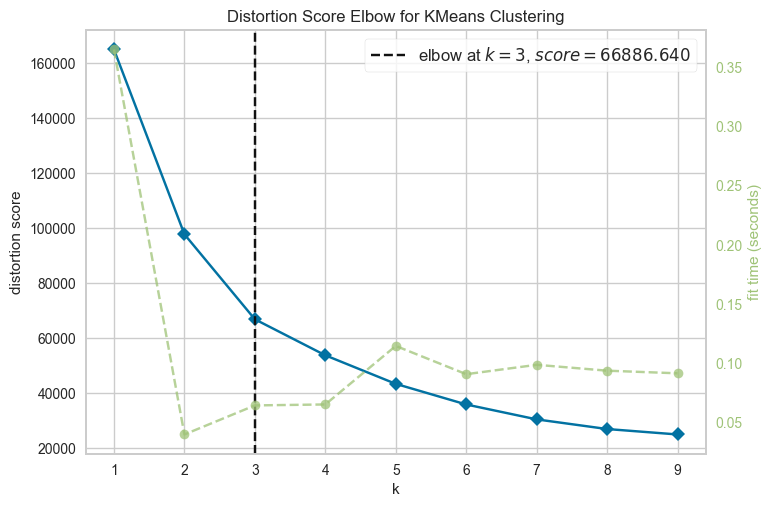

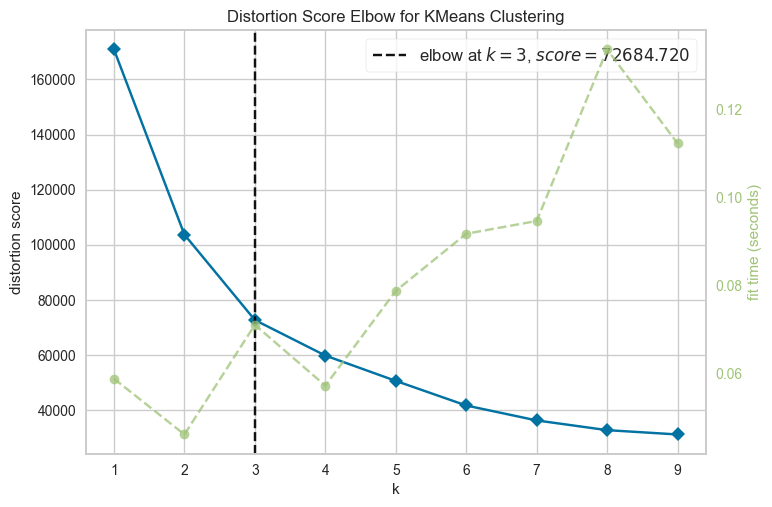

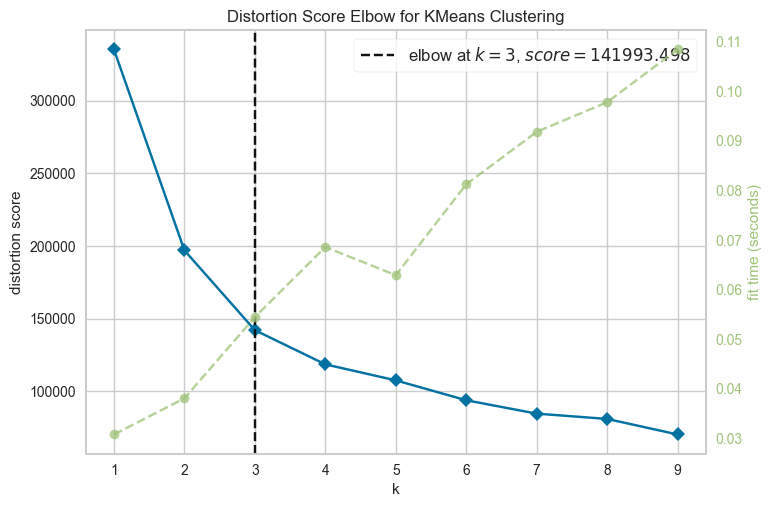

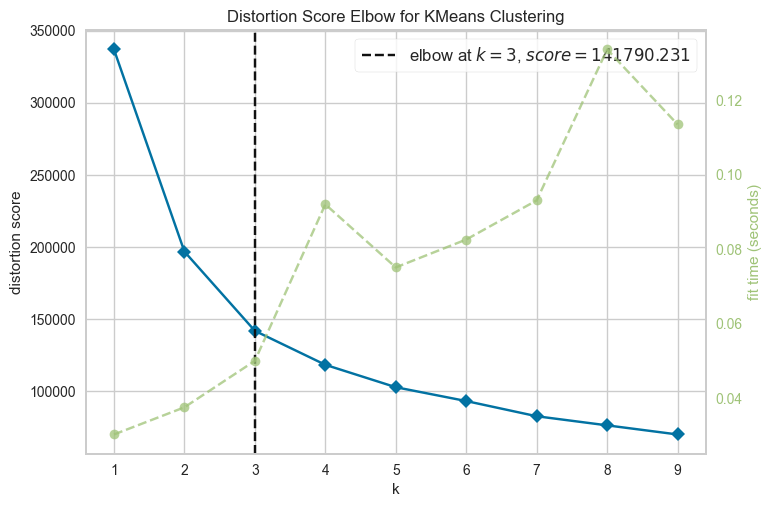

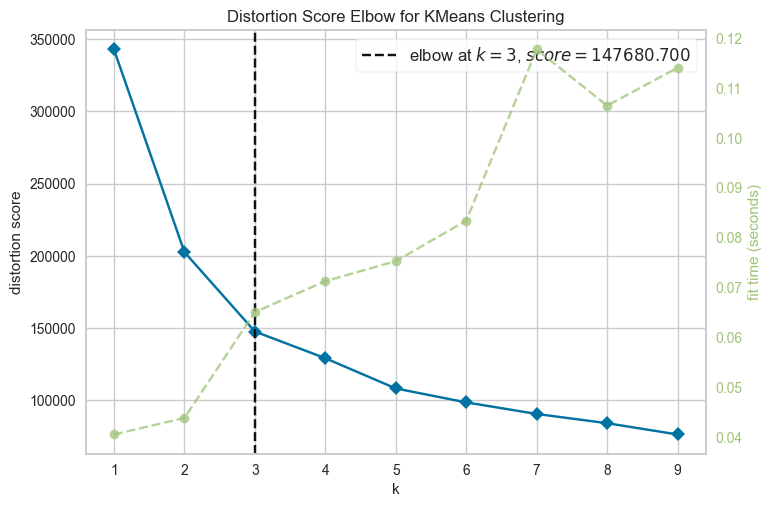

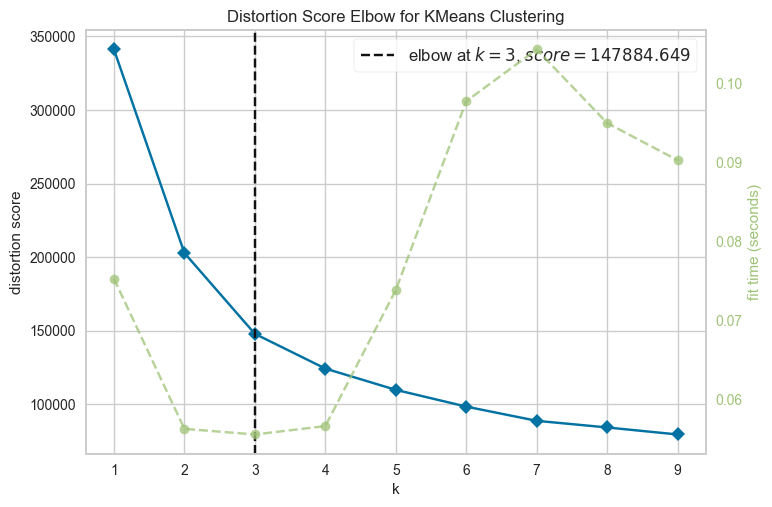

In [6]:
for data in [data_t0, data_t1, data_t2, data_t3, data_t4, data_t5]:
    plot_KElbowVisualizer_X_time(data, 1)

In [7]:
def plot_clusters(data):
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(data)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    centroids

    data["cluster"] = kmeans.labels_

    ###########################
    
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)

    for train_idx, test_idx in splitter.split(data, data['cluster']):
        stratified_sample = data.iloc[test_idx]
        
        

    ############################
    
    fig = px.scatter_3d(
        stratified_sample,
        x=data.columns[0],
        y=data.columns[1],
        z=data.columns[2],
        title='3D Scatter Plot',
        labels={'recency_score': 'Recency Score', 'frequency_score': 'Frequency Score', 'monetary_score': 'Monetary Score'},
        opacity=0.8,
        color="cluster"
    )

    # Personnalisation
    fig.update_traces(marker=dict(size=5))  # Taille des points
    fig.update_layout(scene=dict(
        xaxis_title=data.columns[0],
        yaxis_title=data.columns[1],
        zaxis_title=data.columns[2]
    ))

    # Afficher l'interactivité
    fig.show()
    
plot_clusters(data_t1)

In [8]:
raise AssertionError

AssertionError: 

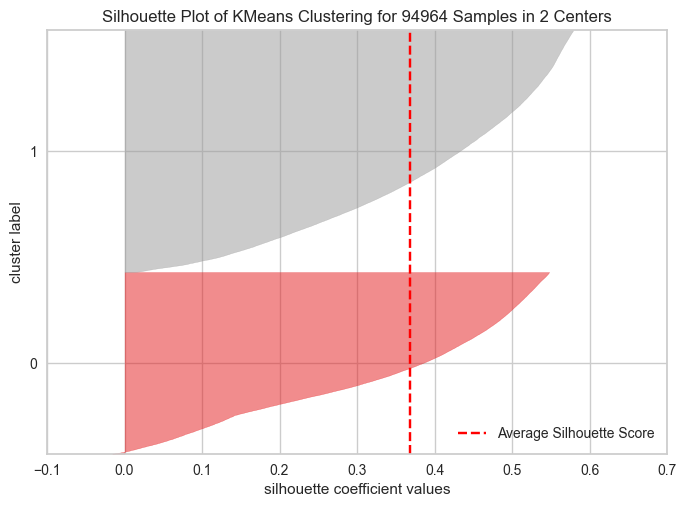

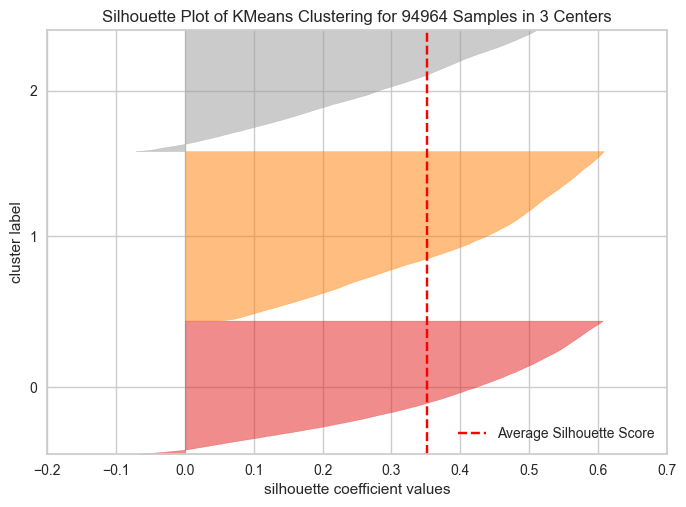

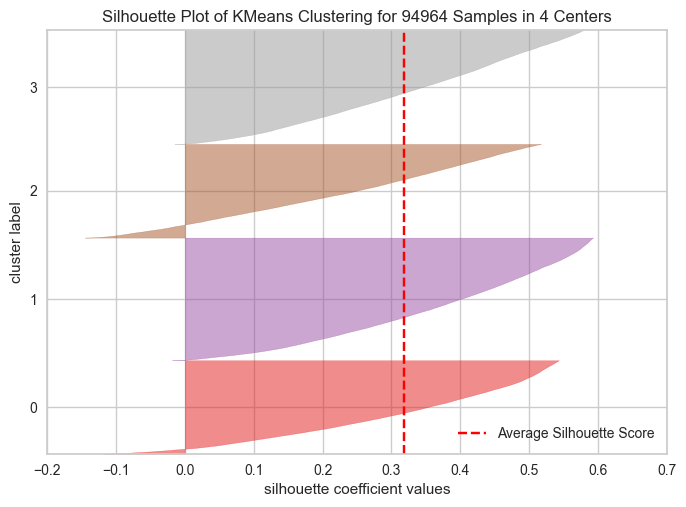

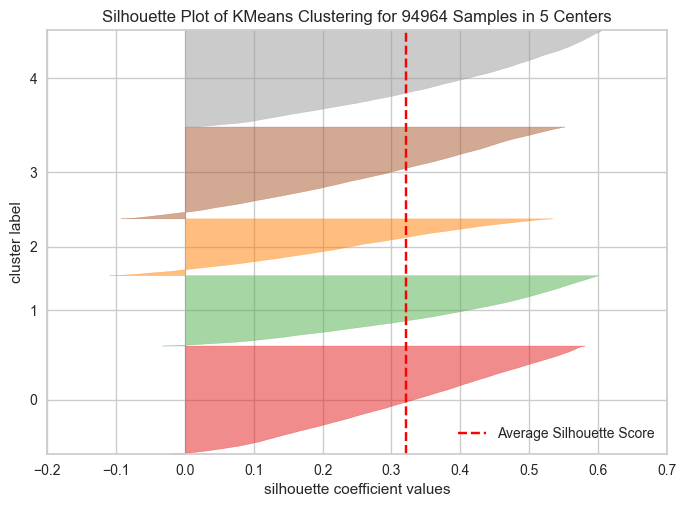

CPU times: total: 49min 11s
Wall time: 14min 37s


In [ ]:
%%time
for k in range (2,6):
    model = KMeans(k)
    visualizer = SilhouetteVisualizer(model)

    visualizer.fit(X)    # Fit the data to the visualizer
    visualizer.poof() 

In [225]:
k_means_inertia_comp = []
k_list = range(1, 10)
for i in range(1,10):
    inertia = []
    for i in k_list:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    k_means_inertia_comp.append(inertia)

In [226]:
import csv
with open(("inertia.csv"), "w") as f:
    writer = csv.writer(f)
    for row in k_means_inertia_comp:
        writer.writerow(row)

## Entrainer le modèle

In [228]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

labels = kmeans.labels_

X["cluster"] = kmeans.labels_
X.head()

C:\Users\alexi\AppData\Local\Temp\ipykernel_19920\2684610989.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency_score,frequency_score,log_monetary_score,cluster
0,0.333420,-0.159365,-3.811917,1
1,-0.366381,-0.159365,0.109424,2
2,0.920989,-0.159365,-0.555946,0
3,-1.343463,-0.159365,0.282870,2
4,1.165260,-0.159365,-1.053148,0


## Récupérer un sous échantillon représentatif

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)

for train_idx, test_idx in splitter.split(X, X['cluster']):
    stratified_sample = X.iloc[test_idx]
    
    
print("Distribution originale :")
print(X['cluster'].value_counts(normalize=True))

print("\nDistribution dans l'échantillon réduit :")
print(stratified_sample['cluster'].value_counts(normalize=True))    

Distribution originale :
cluster
2    0.362639
1    0.306060
0    0.259684
3    0.071617
Name: proportion, dtype: float64

Distribution dans l'échantillon réduit :
cluster
2    0.360324
1    0.307692
0    0.259109
3    0.072874
Name: proportion, dtype: float64


In [230]:
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids

array([[ 1.13464426, -0.1593647 , -0.92869353],
       [-0.24845595, -0.15832645, -2.98480185],
       [-0.6166385 , -0.1593647 , -0.29871212],
       [-0.17706935,  4.3259678 , -1.08012366]])

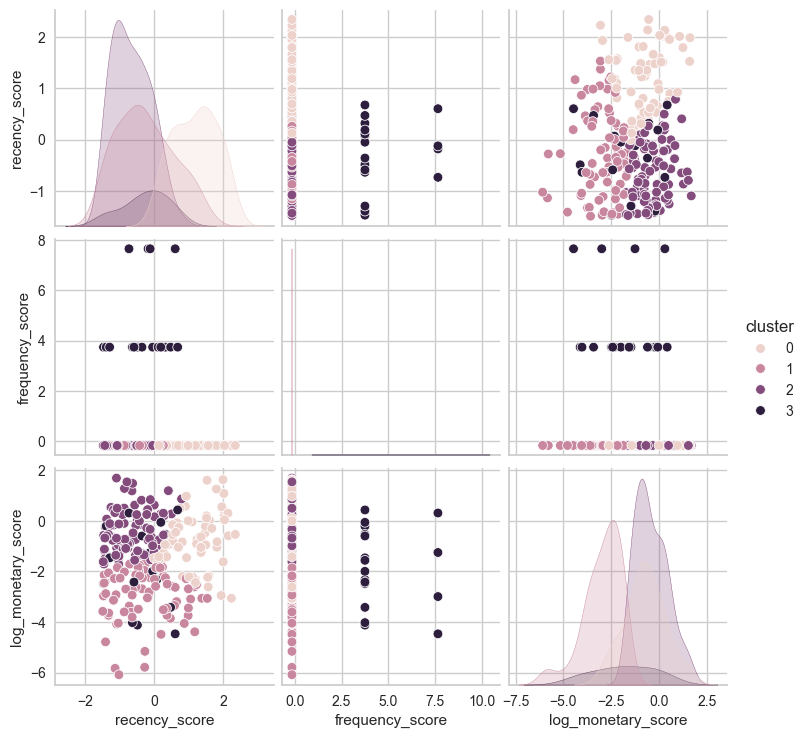

In [231]:
sns.pairplot(stratified_sample, hue="cluster")

## Visualiser

In [232]:
stratified_sample.head()

,recency_score,frequency_score,log_monetary_score,cluster
12708,-0.696476,-0.159365,-0.709692,2
21809,-1.092590,-0.159365,-1.075016,2
1424,-1.475501,-0.159365,-2.970065,1
5078,0.643710,-0.159365,-3.194314,1
15136,-1.330259,-0.159365,-3.735852,1


In [234]:
fig = px.scatter_3d(
    stratified_sample,
    x='recency_score',
    y='frequency_score',
    z='log_monetary_score',
    title='3D Scatter Plot',
    labels={'recency_score': 'Recency Score', 'frequency_score': 'Frequency Score', 'monetary_score': 'Monetary Score'},
    opacity=0.8,
    color="cluster"
)

# Personnalisation
fig.update_traces(marker=dict(size=5))  # Taille des points
fig.update_layout(scene=dict(
    xaxis_title='recency_score',
    yaxis_title='frequency_score',
    zaxis_title='monetary_score'
))

# Afficher l'interactivité
fig.show()

Text(0.5, 0, 'F3')

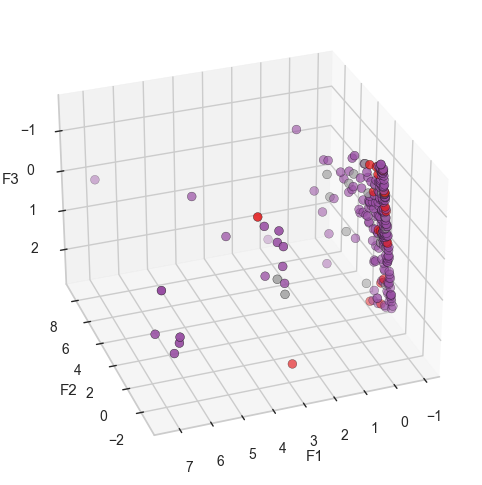

In [ ]:
# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# On affiche nos points : 
ax.scatter(
    stratified_sample.iloc[:, 0],
    stratified_sample.iloc[:, 1],
    stratified_sample.iloc[:, 2],
    c=stratified_sample["cluster"], cmap="Set1", edgecolor="k", s=40)

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

# Clustering hiérarchique

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [208]:
Z = linkage(stratified_sample, method="single")

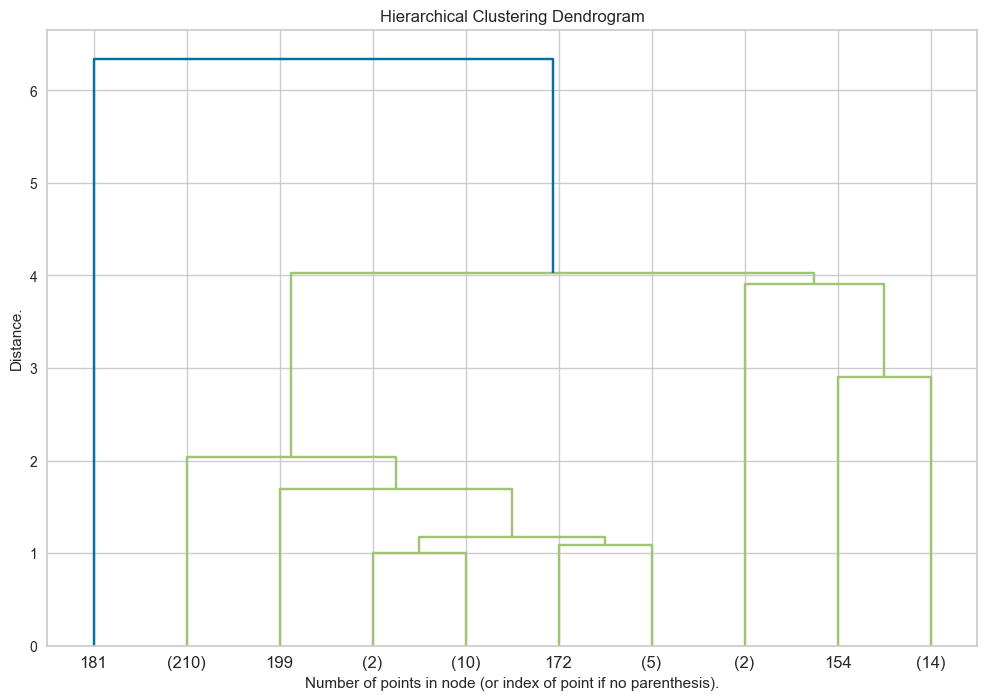

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

# DBSCAN

In [210]:
stratified_sample.head()

,recency_score,frequency_score,monetary_score,cluster
7724,-0.075898,-0.159365,0.106321,1
11230,-0.491817,-0.159365,0.118956,1
15137,-0.623855,-0.159365,0.411733,1
20230,0.287207,-0.159365,0.278397,1
1161,-1.290647,-0.159365,0.091559,1


In [211]:
stratified_sample = stratified_sample[["recency_score", "frequency_score", "monetary_score"]]

In [212]:
from  sklearn.cluster import DBSCAN 


db = DBSCAN(eps=0.3, min_samples=10).fit(stratified_sample)
labels = db.labels_

In [213]:
stratified_sample.shape

(247, 3)

In [214]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [215]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 78


In [216]:
db.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  17,  18,  21,  22,  23,  25,  26,  27,  28,  29,  33,
        34,  38,  42,  44,  46,  47,  48,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  65,  66,  67,  68,  69,  70,  71,
        74,  76,  77,  78,  79,  80,  81,  82,  83,  85,  86,  87,  90,
        91,  92,  93,  94,  95,  96,  99, 102, 103, 104, 106, 107, 108,
       112, 113, 115, 116, 117, 120, 122, 123, 126, 127, 128, 129, 130,
       131, 133, 138, 141, 144, 145, 146, 148, 152, 155, 157, 160, 161,
       162, 163, 165, 166, 167, 168, 169, 174, 177, 178, 180, 182, 183,
       185, 186, 187, 189, 190, 191, 193, 195, 196, 197, 200, 202, 203,
       204, 205, 206, 207, 209, 210, 213, 214, 216, 218, 219, 220, 225,
       228, 229, 230, 233, 234, 236, 239, 241, 242, 243, 245, 246])

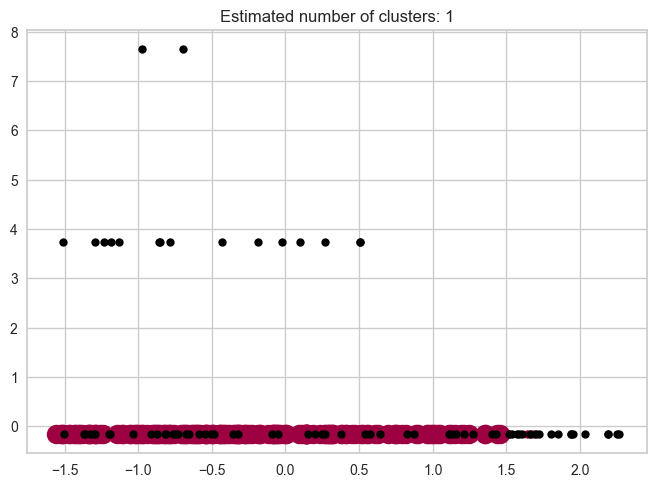

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = stratified_sample[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = stratified_sample[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()